In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import pandas as pd
%matplotlib inline
import pyram as pr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy
from itertools import combinations
from itertools import product

from scipy.spatial import distance

Welcome to pyram: your Raman analysis library!


In [2]:
pr.charge_lib('full')

Charging pure spectra library, needs around a minute ....
Done. Good work!


In [3]:
lib_names = list(pr.lib().keys())

In [4]:
def RRUFF2DF():
    name = ['']*len(lib_names)
    RRUFF_ID = ['']*len(lib_names)
    spectra_type = ['']*len(lib_names)
    wave_length = ['']*len(lib_names)
    spectra = [0]*len(lib_names)

    for i in range(len(lib_names)):
        name_t = ''
        RRUFF_ID_t = ''
        spectra_type_t = ''
        wave_length_t = ''
        step = 0

        for j in lib_names[i]:
            if step == 0 and j != '_':
                name_t += j
            elif step == 2 and j != '_':
                RRUFF_ID_t += j
            elif step == 4 and j != '_':
                spectra_type_t += j
            elif step == 6 and j != '_':
                wave_length_t += j
            else:
                step+=1
            
        name[i] = name_t
        RRUFF_ID[i] = RRUFF_ID_t
        spectra_type[i] = spectra_type_t
        wave_length[i] = wave_length_t
        spectra[i] = pr.lib(lib_names[i])

    global RRUFF_lib
    RRUFF_lib = pd.DataFrame({'name':name, 'RRUFF_ID':RRUFF_ID, 'spectra_type':spectra_type, 'wave_length':wave_length, 'S':spectra})
   
    return RRUFF_lib

RRUFF_lib = RRUFF2DF()
RRUFF_lib

,name,RRUFF_ID,spectra_type,wave_length,S
0,Abelsonite,R070007,Raman,532,"[[154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 16..."
1,Abelsonite,R070007,Raman,785,"[[233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 23..."
2,Abhurite,R060227,Raman,785,"[[107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 11..."
3,Actinolite,R040063,Raman,514,"[[140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 14..."
4,Actinolite,R040063,Raman,532,"[[119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 12..."
...,...,...,...,...,...
5122,Zwieselite,R050279,Raman,780,"[[135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 14..."
5123,Zykaite,R070477,Raman,532,"[[148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 15..."
5124,Zykaite,R070477,Raman,785,"[[146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 15..."
5125,unknown,R080054,Raman,532,"[[160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 16..."


In [13]:
elements = ['Quartz', 'Albite', 'Calcite', 'Dolomite', 'Gypsum', 'Magnesite', 'Mica', 'Talc', 'Forsterite', 'Lizardite']
#elements = ['Calcite', 'Dolomite', 'Siderite','Talc']

cond = ''
for i in elements[:-1]:
    cond += 'name == "'+i+'" or '
cond += 'name == "'+elements[-1]+'"'

data = RRUFF_lib.query(cond)


def get_confusion_similarity(data):
    
    data.reset_index(inplace=True, drop=True)

    names = data.name
    match = np.zeros((len(names),len(names)))
    
    for i in range(len(names)):
        for j in range(len(names)):
            match[i,j] = pr.cos_sim_w_shift(data.iloc[i].S, data.iloc[j].S, shift=5)

    return match

M = get_confusion_similarity(data)

<AxesSubplot:>

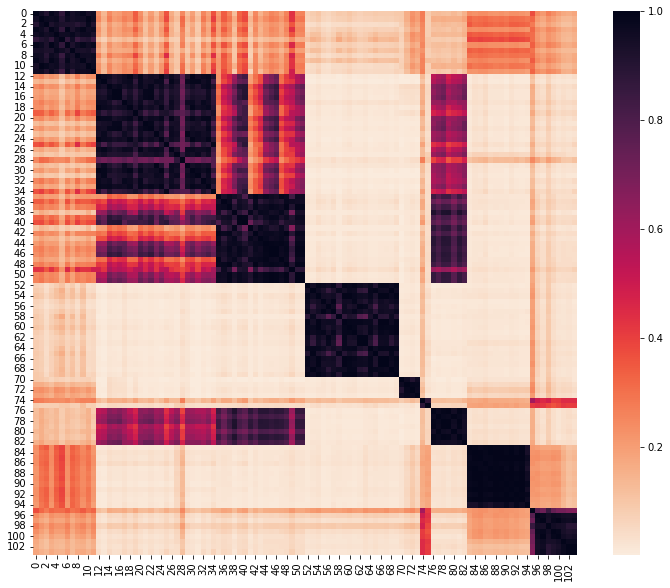

In [14]:
plt.figure(figsize=(13,10))
sns.heatmap(M, cmap = sns.color_palette("rocket_r", as_cmap=True),annot=False, square=True)